In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor , export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree 
import matplotlib.pyplot as plt


iris = datasets.load_iris()
dataset = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target']
)

dataset.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [2]:
dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [8]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3.0, random_state=5
)
print("Training size =", len(X_train))
print("Testing size =", len(X_test))
print(y_test)

Training size = 100
Testing size = 50
[1. 2. 2. 0. 2. 1. 0. 1. 0. 1. 1. 2. 2. 2. 0. 0. 2. 2. 0. 0. 1. 2. 0. 1.
 1. 2. 1. 1. 1. 2. 0. 1. 1. 0. 1. 0. 0. 2. 0. 2. 2. 1. 0. 0. 1. 2. 1. 2.
 2. 0.]


In [10]:
clf_gini = DecisionTreeClassifier(
    criterion='gini',
    random_state=100,                            
    max_depth=3,
    min_samples_leaf=5
)
clf_gini.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:

clf_gini.predict([[4, 4, 3, 3]])



array([2.])

In [33]:
y_pred = clf_gini.predict(X_test)
print(y_pred)

[1. 1. 2. 0. 2. 1. 0. 2. 0. 1. 1. 1. 2. 2. 0. 0. 2. 2. 0. 0. 1. 2. 0. 1.
 1. 2. 1. 1. 1. 2. 0. 1. 1. 0. 1. 0. 0. 2. 0. 2. 2. 1. 0. 0. 1. 2. 1. 2.
 2. 0.]


In [39]:

# correct = sum(1 for a, b in zip(y_test, y_pred) if a == b)
# total = len(y_test)
# accuracy_manual = correct / total * 100

# print(correct, "/", total)
# print("Accuracy =", accuracy_manual)


accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy  = ' + str(accuracy) + ' %.')





Accuracy  = 94.0 %.


In [43]:
from sklearn.metrics import confusion_matrix 
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, labels=[2,0,1]))


Confusion Matrix:
[[15  0  2]
 [ 0 16  0]
 [ 1  0 16]]


In [37]:
text_representation = export_text(clf_gini, feature_names=list(dataset.columns[:-1]))
print(text_representation)


|--- petal length (cm) <= 2.45
|   |--- class: 0.0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 1.0
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 1.0
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2.0



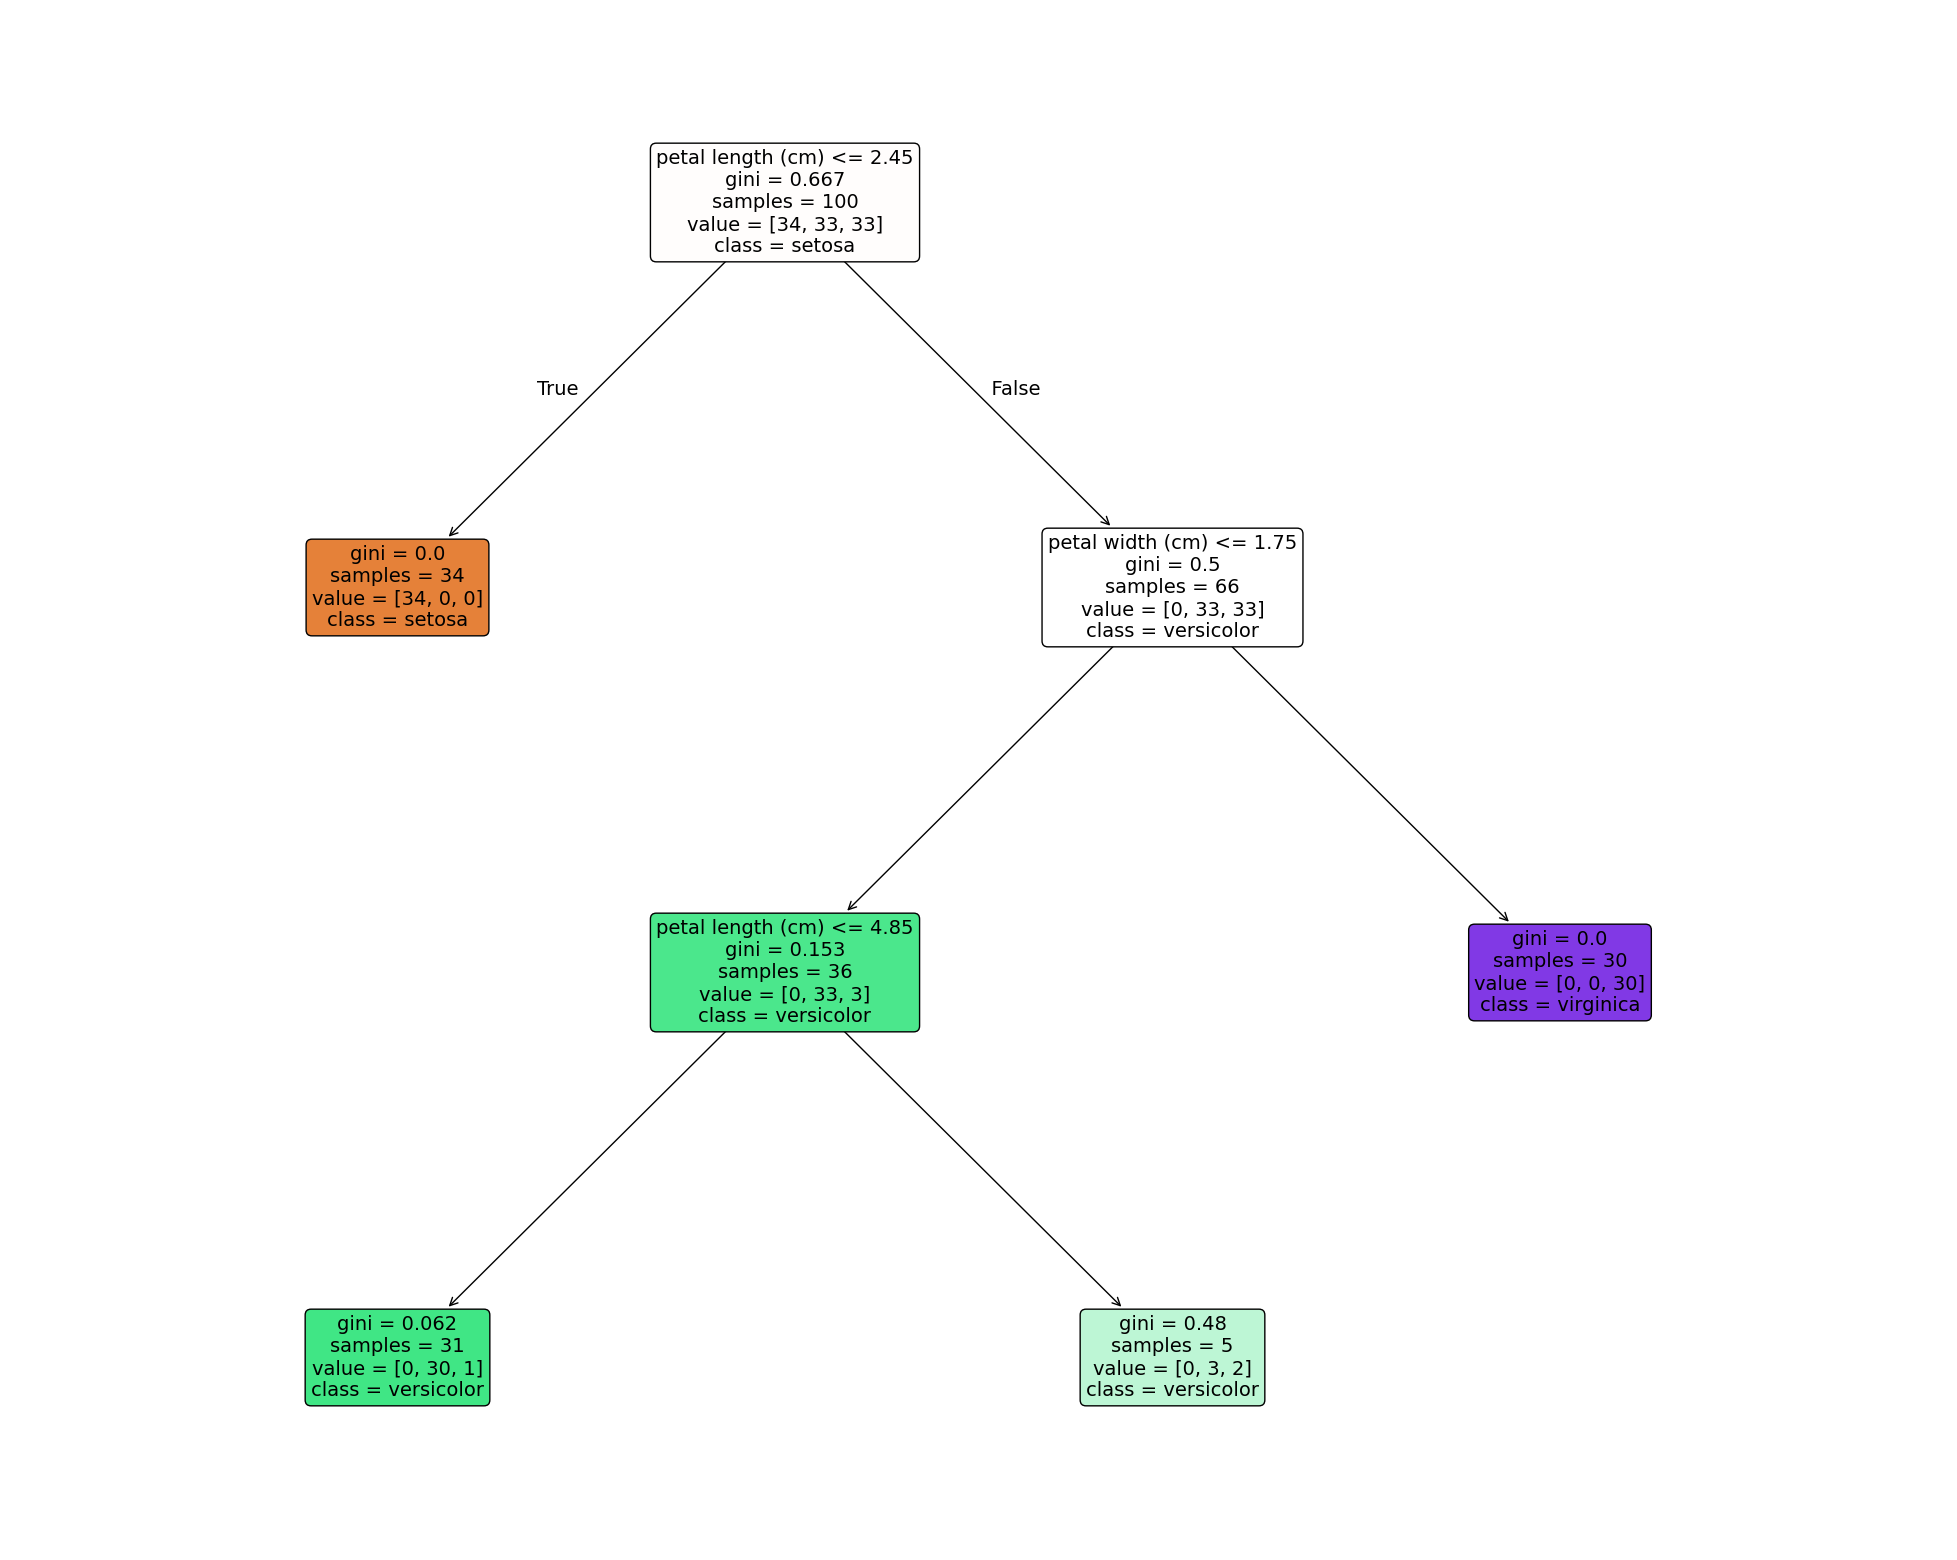

In [8]:
plt.figure(figsize=(25, 20))
tree.plot_tree(
    clf_gini,
    feature_names=list(dataset.columns[:-1]),
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=14
)
plt.show()


In [40]:


reg = DecisionTreeRegressor(
    random_state=100,
    max_depth=3,
    min_samples_leaf=5
)

reg.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [41]:
y_pred_reg = reg.predict(X_test)
print(y_pred_reg)

[1.03225806 1.4        2.         0.         2.         1.03225806
 0.         2.         0.         1.03225806 1.03225806 1.4
 2.         2.         0.         0.         2.         2.
 0.         0.         1.03225806 2.         0.         1.4
 1.03225806 2.         1.03225806 1.03225806 1.03225806 2.
 0.         1.03225806 1.03225806 0.         1.03225806 0.
 0.         2.         0.         2.         2.         1.03225806
 0.         0.         1.03225806 2.         1.03225806 2.
 2.         0.        ]


In [42]:


from sklearn.metrics import r2_score

y_pred_reg = reg.predict(X_test) 
r2 = r2_score(y_test, y_pred_reg)

print("R2 score :", round(r2, 2))



R2 score : 0.94


In [24]:
import pandas as pd


accuracy = 94.0 
r2_score_value = 0.94
r2_score_percent = r2_score_value * 100 


data = {
    'Phương pháp': ['Decision Tree Classifier (Phân loại)', 'Decision Tree Regressor (Hồi quy)'],
    'Chỉ số Đánh giá': ['Accuracy (%)', 'R2 Score (%)'],
    'Kết quả (%)': [accuracy, round(r2_score_percent, 2)] 
}

df_comparison = pd.DataFrame(data)

print(" Bảng So Sánh Kết Quả Mô Hình (Phần trăm)")
print(df_comparison.to_markdown(index=False))

 Bảng So Sánh Kết Quả Mô Hình (Phần trăm)
| Phương pháp                          | Chỉ số Đánh giá   |   Kết quả (%) |
|:-------------------------------------|:------------------|--------------:|
| Decision Tree Classifier (Phân loại) | Accuracy (%)      |            94 |
| Decision Tree Regressor (Hồi quy)    | R2 Score (%)      |            94 |


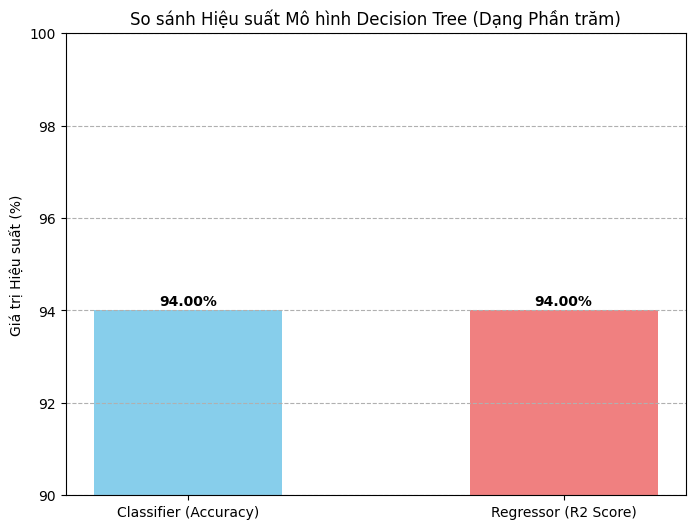

In [26]:
import matplotlib.pyplot as plt


models = ['Classifier (Accuracy)', 'Regressor (R2 Score)']
performance = [94.0, 94.0]
colors = ['skyblue', 'lightcoral']


plt.figure(figsize=(8, 6))
plt.bar(models, performance, color=colors, width=0.5)


plt.ylabel('Giá trị Hiệu suất (%)')
plt.title('So sánh Hiệu suất Mô hình Decision Tree (Dạng Phần trăm)')
plt.ylim(90, 100) 


for i, val in enumerate(performance):
    plt.text(i, val + 0.1, f'{val:.2f}%', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--')
plt.show()

print("\n")